# Thompson Sampling Algorithm:

#### A leitura de cada linha representa uma rodada de apresentação de cada 1 dos anúncios.
#### A cada rodada verifica-se a betavariacao de todos anúncios para então decidir o que está performando melhor. 
#### No início os sorteios serão aleatórios pois as matrizes Ⲁ e β estão vazias, porém a cada a medida que as rodadas vão acontecendo, as matrizes Ⲁ e β parâmetros da distribuição beta vão se preenchendo, tal qual essa beta variação irá nos trazer a melhor opção .
## 
#### Para mais detalhes sobre o algoritmo, consulte : https://ao.wikiqube.net/wiki/Thompson_sampling
## 

---------------------

In [100]:
import pandas, random
import matplotlib.pyplot as plt

Carregando nossa base de rodadas de anúncios e visualizando o formato da amostragem

In [101]:
amostragem = pandas.read_csv('Ads_CTR_Optimisation.csv')
amostragem.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


Abaixo verificamos pela linha mean (média), qual é o anúncio que tem a melhor perfomance de cliques, o anúncio 5 com 26,9%.

In [102]:
amostragem.describe()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,0.170300,0.129500,0.072800,0.119600,0.269500,0.012600,0.111200,0.209100,0.095200,0.04890
std,0.375915,0.335769,0.259821,0.324509,0.443722,0.111546,0.314395,0.406686,0.293506,0.21567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


Nosso intuito agora então é utilizar o algoritmo de amostragem thompson para ir selecionando os anúncios que melhor performam e então aumentar as chances de mostrá-los na próxima rodada.

---

Inicializando as variáveis utilizadas nos scripts. A lista historico_sorteio é a que o algoritmo registrará as escolhas de qual anúncio tem a melhor performance.

In [103]:
rodadas = 1000
conj_contexto = amostragem.columns

matriz_alfa = [0] * len(conj_contexto)
matriz_beta = [0] * len(conj_contexto)

contexto_sorteado = []
historico_sorteio = []

In [104]:
for rodada in range(rodadas):
    contexto_sorteado = 0
    maior_pontuacao_sorteio = 0
    
    for contexto in range(len(conj_contexto)):
        pontuacao_sorteio = random.betavariate( matriz_alfa[contexto]+1, matriz_beta[contexto]+1 )
        
        if pontuacao_sorteio > maior_pontuacao_sorteio:
            maior_pontuacao_sorteio = pontuacao_sorteio
            
            contexto_sorteado = contexto
    
    historico_sorteio.append(contexto_sorteado+1) # o+1 
    
    if amostragem.values[rodada, contexto_sorteado] == 1:
        matriz_alfa[contexto_sorteado] += 1
    else:
        matriz_beta[contexto_sorteado] += 1


Plotando o histórico das escolhas que o algoritmo fez ao longo das rodadas.

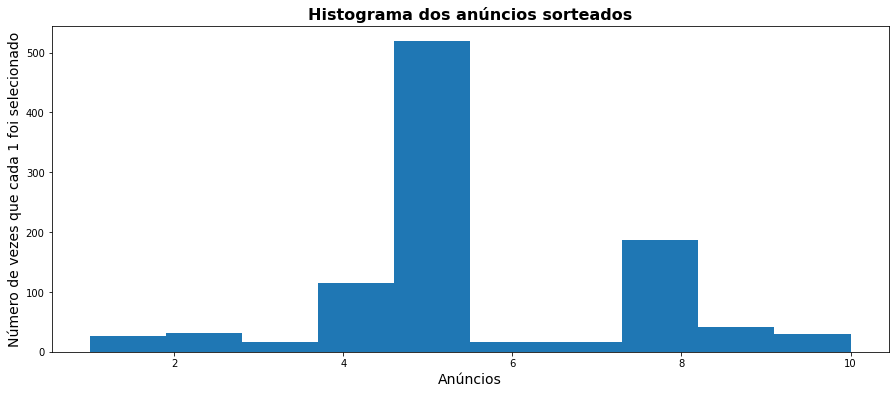

In [105]:
plt.figure(figsize=(15,6))
plt.hist(historico_sorteio)
plt.title('Histograma dos anúncios sorteados',fontsize=16, fontweight='bold')
plt.xlabel('Anúncios',fontsize=14)
plt.ylabel('Número de vezes que cada 1 foi selecionado', fontsize=14)
plt.show()

# Conclusão 
# 
#### Pelo describe() da amostragem lá em cima identificamos anúncio 5, como sendo o melhor com 26,9% de chance de clique e o anúncio 5 como o segundo melhor com 20,9% de chance, o que concluímos pelo nosso algoritmo, com menos de 1000 rodadas de execução, conseguimos identificar os melhores anúncios a serem exibidos.
## 
### Dessa forma concluimos que o algoritmo de amostragem Thompson se prova muito eficiente para a resolução dos problemas do tipo "Multi-Armed-Bandit"
## 